In [1]:
# pip installs
!pip install lightgbm

In [2]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [3]:
# Load file
df = pd.read_csv("all_merged_sw.csv",
                 usecols=['post_id', 'date', 'sw_2_num_comments', 'sw_2_score', 'sw_2_total_awards',
                          'author_commentkarma', 'sw_2_compound_score', 'trustworthy', 
                          'sw_2_author_trust', 'author_id', 'author_name', 'author_trust',
                          'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

# Apply trust filter
df = df[(df["sw_2_author_trust"] >= 0.8) & (df["trustworthy"] == 1)]

df

,post_id,date,author_commentkarma,author_id,author_name,ticker,post_type,adjclose_20_X,adjclose_19_X,adjclose_18_X,...,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y,trustworthy,author_trust,sw_2_num_comments,sw_2_score,sw_2_total_awards,sw_2_compound_score,sw_2_author_trust
92,ed2x6fn,2019-01-02,712.0,rw1ynq0,martimook,CPSI,comment,25.979984,25.950769,25.882610,...,25.366512,25.347040,25.551525,1,0.800000,2.0,61.0,0.0,0.05160,0.800000
1144,ed7nipz,2019-01-04,3.0,4jd5aav,fz27fz,BPY,comment,14.357750,14.423088,14.292412,...,14.864111,14.864111,15.166289,1,1.000000,0.0,-1.0,0.0,0.44040,1.000000
1238,edbgm1u,2019-01-05,7053.0,16ggvx,oheggroll,CPST,comment,7.100000,7.000000,7.200000,...,8.900000,9.200000,9.000000,1,0.608696,1.0,6.0,0.0,0.00425,0.804348
1313,edanxb1,2019-01-05,254.0,302u3wv,dafquaf,ABEO,comment,8.500000,8.200000,7.810000,...,6.810000,7.600000,7.230000,1,1.000000,0.0,1.0,0.0,-0.29600,1.000000
1327,edanxb1,2019-01-05,254.0,302u3wv,dafquaf,CPST,comment,7.100000,7.000000,7.200000,...,8.900000,9.200000,9.000000,1,1.000000,1.0,6.0,0.0,0.00425,0.804348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939152,ghlx56q,2020-12-31,495.0,4d7mkpro,schmitty257674,ATXI,comment,3.390000,3.410000,3.330000,...,6.010000,5.920000,6.230000,1,0.862069,0.0,5.5,0.0,0.35060,0.931034
939153,ghlx56q,2020-12-31,495.0,4d7mkpro,schmitty257674,STLD,comment,35.961098,37.391205,37.619621,...,35.160000,34.270000,34.919998,1,0.862069,0.0,5.5,0.0,0.35060,0.931034
939869,ghms232,2020-12-31,66817.0,5dmrn99z,Experienced_AP,PBPB,comment,4.720000,4.700000,4.660000,...,4.880000,5.390000,5.430000,1,1.000000,0.0,1.0,0.0,0.10270,1.000000
939989,ghkio9m,2020-12-31,75.0,8nh43gr6,Jelly_Sir,ANAB,comment,25.790001,25.790001,24.680000,...,24.230000,25.920000,25.940001,1,1.000000,0.0,1.0,0.0,0.44040,1.000000


In [4]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'author_commentkarma', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_20_X',
       'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
       'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
       'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
       'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
       'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y', 'trustworthy',
       'author_trust', 'sw_2_num_comments', 'sw_2_score',
       'sw_2_total_awards', 'sw_2_compound_score', 'sw_2_author_trust'],
      dtype=ob

In [5]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [6]:
# Get the X-variable columns
df_X = df[['sw_2_num_comments', 'sw_2_score', 'sw_2_total_awards', 'author_commentkarma',
           'sw_2_compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 2.         61.          0.         ... 27.21815872 26.13175964
  26.09296036]
 [ 0.         -1.          0.         ... 15.19852448 15.01395988
  15.0219841 ]
 [ 1.          6.          0.         ...  8.30000019  8.5
   8.5       ]
 ...
 [ 0.          3.          0.         ... 33.59392548 33.70315552
  33.31587601]
 [ 0.          2.          0.         ... 34.14797974 34.2060051
  33.93521881]
 [ 0.          2.          0.         ... 14.27999973 14.18000031
  14.64999962]]
[[  0.           2.           0.         ...  10.82958603  10.5834589
   10.75082493]
 [  0.           2.           0.         ...  35.86999893  35.66999817
   34.08000183]
 [  1.           4.           0.         ... 134.28224182 130.96151733
  133.79798889]
 ...
 [  0.           1.           0.         ...   3.47000003   3.3499999
    3.43000007]
 [  0.           1.           0.         ...  29.62999916  29.70000076
   30.        ]
 [  0.           1.           0.         ...  24.92000008  23.57999992
   23.2

In [7]:
# Initialize Model
model = LGBMRegressor(n_estimators=1000)

# Wrap Model for Multiple Outputs
wrapper = MultiOutputRegressor(model).fit(X_train, y_train)

# Wrapper Prediction
ypred = wrapper.predict(X_test)

In [8]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  82.6572295739847
The RMSE for adjClose_3_Y =  82.7936252784435
The RMSE for adjClose_4_Y =  95.55285979904895
The RMSE for adjClose_5_Y =  91.3768163854141
The RMSE for adjClose_6_Y =  90.60311168077212
The RMSE for adjClose_7_Y =  88.85932323732189
The RMSE for adjClose_8_Y =  92.70057055697418
The RMSE for adjClose_9_Y =  95.18722698984668
The RMSE for adjClose_10_Y =  95.62464113859035
The RMSE for adjClose_11_Y =  93.86937928542852
The RMSE for adjClose_12_Y =  92.21405827255523
The RMSE for adjClose_13_Y =  91.84470125293343
The RMSE for adjClose_14_Y =  93.16387614686055
The RMSE for adjClose_15_Y =  96.62661140129441
The RMSE for adjClose_16_Y =  95.58692483307155
The RMSE for adjClose_17_Y =  96.36489395596803
The RMSE for adjClose_18_Y =  96.43997525617503
The RMSE for adjClose_19_Y =  95.99145285011238
The RMSE for adjClose_20_Y =  96.72062534259636
The RMSE for adjClose_21_Y =  98.91231418790541
The RMSE for 5day_min =  1.8145329889196982
The RMS

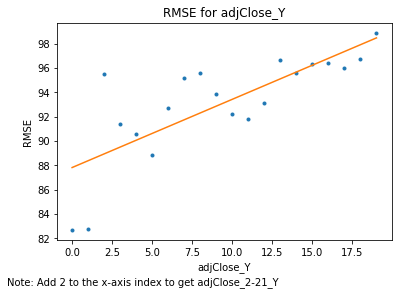

In [9]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [10]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in rmse
for i in range(1, len(mae)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the RMSE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  17.188105226980834
The MAE for adjClose_3_Y =  17.254661382760126
The MAE for adjClose_4_Y =  18.63694317639808
The MAE for adjClose_5_Y =  18.496554363102895
The MAE for adjClose_6_Y =  18.389854360852418
The MAE for adjClose_7_Y =  18.251805362295897
The MAE for adjClose_8_Y =  18.63739269739848
The MAE for adjClose_9_Y =  18.966952813895816
The MAE for adjClose_10_Y =  18.831445213615403
The MAE for adjClose_11_Y =  18.546571363506008
The MAE for adjClose_12_Y =  18.520232768557594
The MAE for adjClose_13_Y =  18.737972471213347
The MAE for adjClose_14_Y =  19.151718311907572
The MAE for adjClose_15_Y =  19.666112037443863
The MAE for adjClose_16_Y =  19.940344608914753
The MAE for adjClose_17_Y =  20.35737513205525
The MAE for adjClose_18_Y =  20.314804977720453
The MAE for adjClose_19_Y =  20.13947537674853
The MAE for adjClose_20_Y =  20.345909363012094
The MAE for adjClose_21_Y =  21.13078091720898
The MAE for 5day_min =  1.5335059087976957
The MAE fo

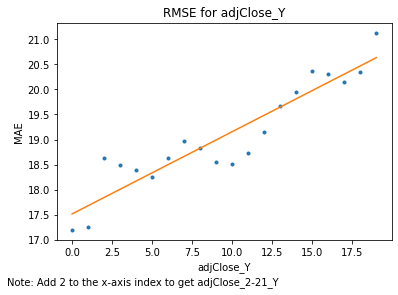

In [11]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()